In [1]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [2]:
df.shape

(4377, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [6]:
df.head(10)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [25]:
import duckdb

df_quantity_brand = duckdb.query(
    """
             SELECT make, SUM(quantity) as Quantity 
             FROM df 
             GROUP BY make 
             ORDER BY quantity DESC"""
).df()

df_quantity_brand.head()

,Make,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


In [26]:
df_quantity_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      65 non-null     object 
 1   Quantity  66 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [27]:
df["Year"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

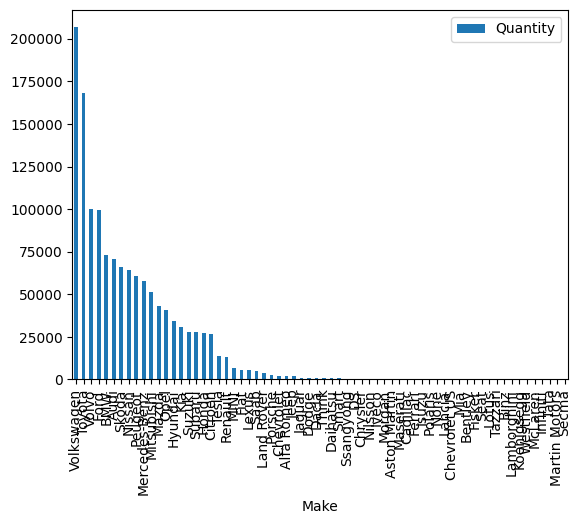

In [28]:

df_quantity_brand.plot(kind="bar", x="Make", y="Quantity");

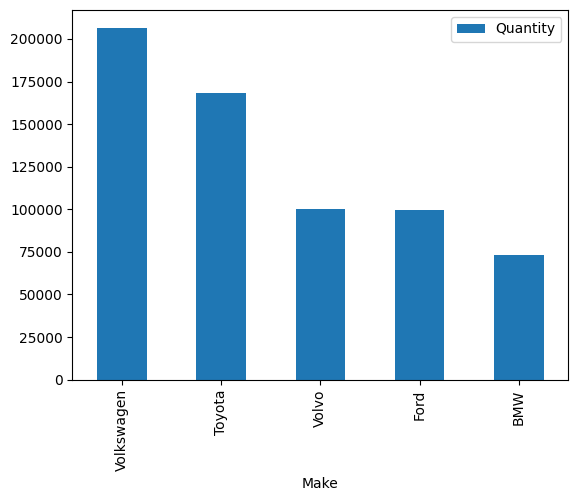

In [29]:
df_quantity_brand.head().plot(kind="bar", x="Make", y="Quantity");

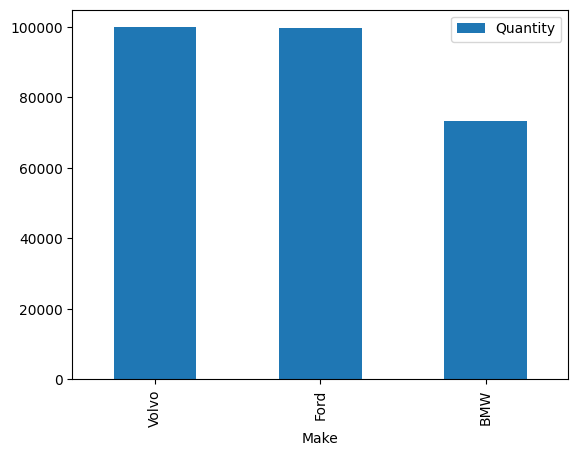

In [42]:
df_quantity_brand.iloc[2:5].plot(kind="bar", x="Make", y="Quantity");

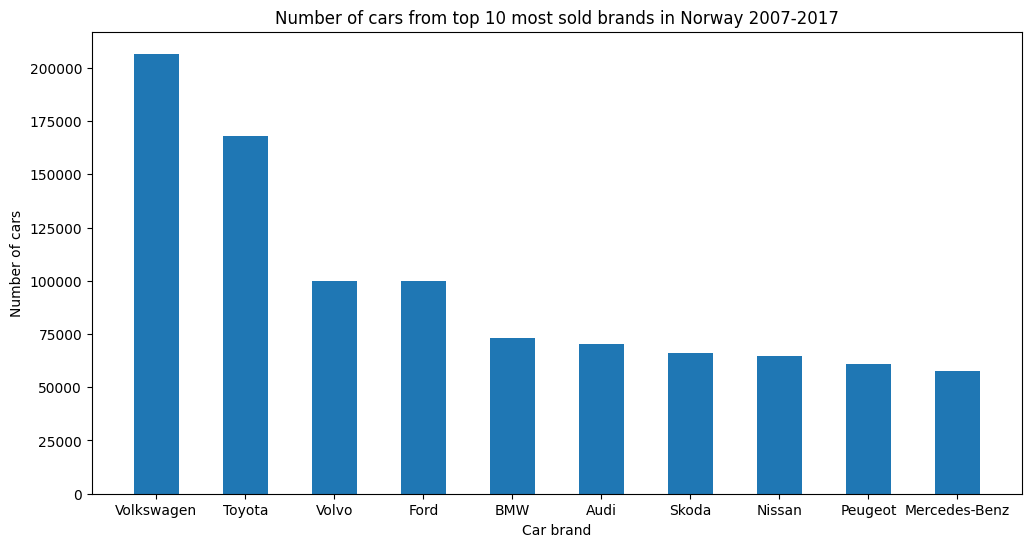

In [52]:
import matplotlib.pyplot as plt



df_quantity_brand_top_10 = df_quantity_brand.iloc[:10]

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(
        x=df_quantity_brand_top_10["Make"],
        height=df_quantity_brand_top_10["Quantity"],
        width=0.5,
    )

ax.set(
        title="Number of cars from top 10 most sold brands in Norway 2007-2017",
        xlabel="Car brand",
        ylabel="Number of cars",
    )

fig.savefig("figures/bars_top_cars")

Line chart


In [69]:
df_quantity_year = duckdb.query("""
             
SELECT year,SUM(quantity) AS Quantitiy
FROM df
GROUP BY year
ORDER BY year             
         

""").df().set_index("Year")

df_quantity_year

,Quantitiy
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


<Axes: xlabel='Year'>

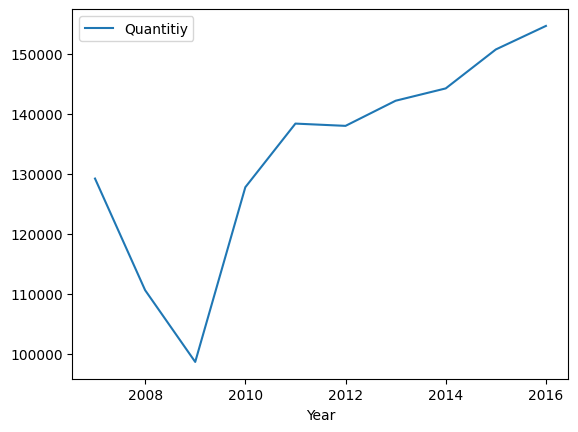

In [71]:
df_quantity_year.iloc[:-1].plot()

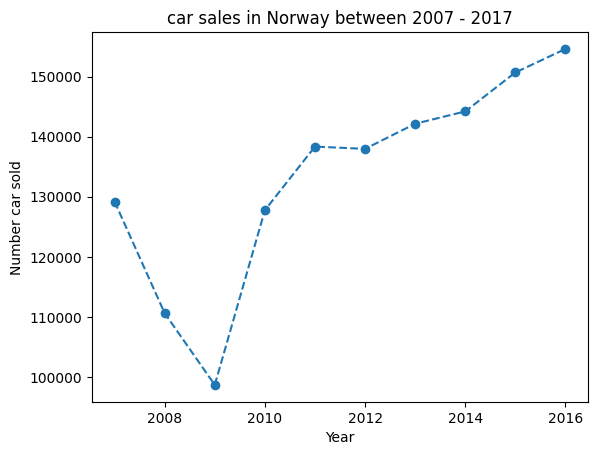

In [84]:
ax = df_quantity_year.iloc[:-1].plot(title="car sales in Norway between 2007 - 2017",
                                xlabel= "Year",
                                ylabel= "Number car sold",
                                style= "--o",)

ax.legend().remove()
fig = ax.get_figure()

fig.savefig("figures/car_sales_by_year")